[*********************100%***********************]  1 of 1 completed
Optimal trading speed: 2577.25 shares per minute


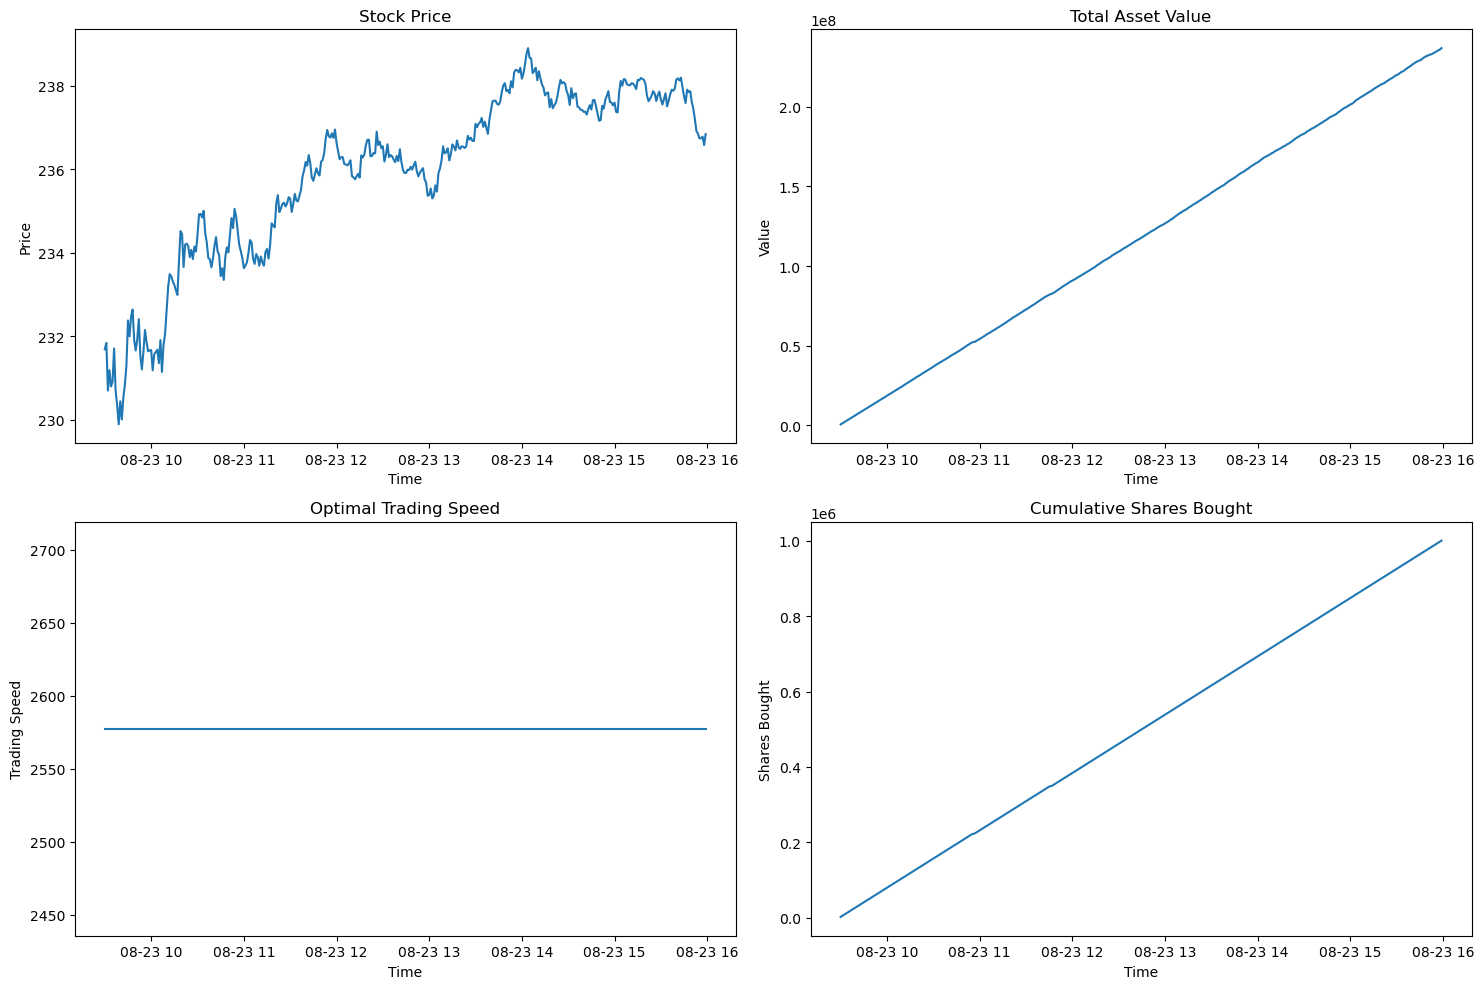

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
# 下载数据设置
def download_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date, interval="1m")
    return data
# 模拟最优买入策略
def optimal_acquisition(data, total_shares, k, alpha):
    trading_duration = len(data)
    acquisition_speed = total_shares / (trading_duration + k/alpha) 
    times = []
    stock_prices = []
    total_asset_values = []
    global trading_speeds
    trading_speeds = []
    cumulative_shares_bought = []
    cumulative_shares = 0  
    for time, row in data.iterrows():
        shares_to_buy = acquisition_speed
        cumulative_shares += shares_to_buy
        current_price = row['Close']
        stock_prices.append(current_price)
        total_asset_values.append(current_price * cumulative_shares)
        trading_speeds.append(acquisition_speed)
        cumulative_shares_bought.append(cumulative_shares)
        times.append(time)
# 绘图
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 2, 1)
    plt.plot(times, stock_prices)
    plt.title("Stock Price")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.subplot(2, 2, 2)
    plt.plot(times, total_asset_values)
    plt.title("Total Asset Value")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.subplot(2, 2, 3)
    plt.plot(times, trading_speeds)
    plt.title("Optimal Trading Speed")
    plt.xlabel("Time")
    plt.ylabel("Trading Speed")
    plt.subplot(2, 2, 4)
    plt.plot(times, cumulative_shares_bought)
    plt.title("Cumulative Shares Bought")
    plt.xlabel("Time")
    plt.ylabel("Shares Bought")  
    plt.tight_layout()
plt.show()
# 参数设置
data = download_data("TSLA", "2023-08-23", "2023-08-24")
optimal_acquisition(data, 1000000, 0.001, 0.1)
# 计算最优执行速度
print(f"Optimal trading speed: {trading_speeds[0]:.2f} shares per minute")

[*********************100%***********************]  1 of 1 completed


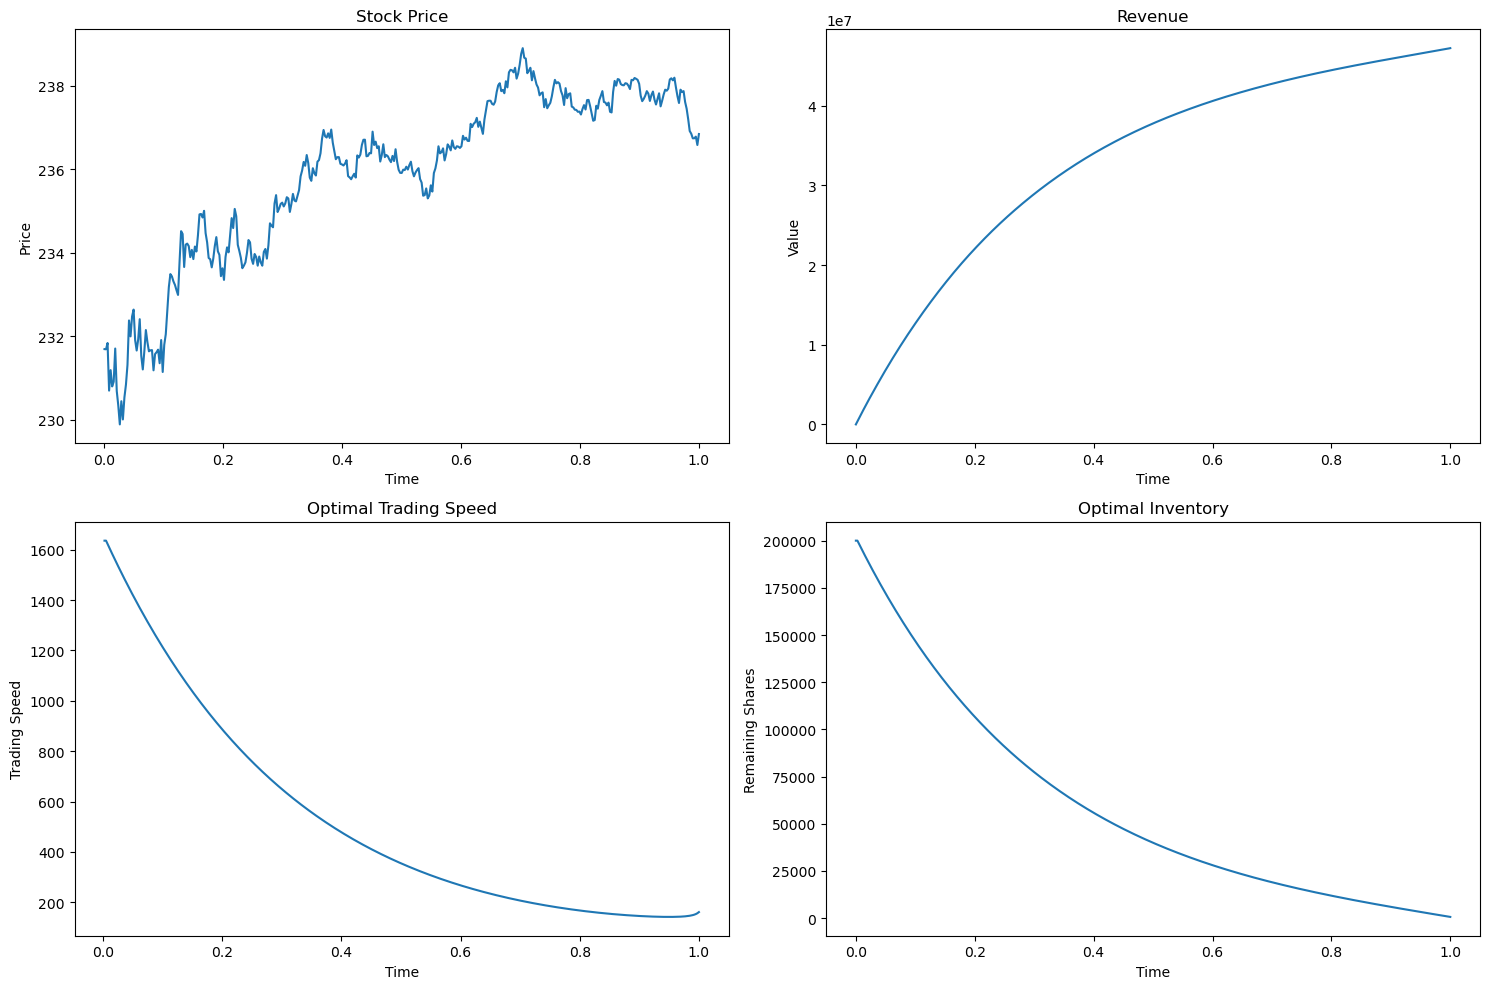

In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
# 下载特斯拉7月14日的数据
data = yf.download("TSLA", start="2023-08-23", end="2023-08-24", interval="1m")
prices = data['Close'].values
M = len(prices)  # 交易次数
# 设置参数
S0 = prices[0]
N = 200000 # 初始股票数量
T = 1
k = 1e-3
b = 1e-3
alpha = 0.1
phi = 0.01
sigma = 0.30
# 计算其他参数
gamma = np.sqrt(phi/k)
xi = (alpha - 0.5 * b + np.sqrt(k * phi))/(alpha - 0.5 * b - np.sqrt(k * phi))
tt = np.linspace(0, 1, M + 1)
# 最优交易速度和库存过程
v = np.zeros(M + 1)
q = np.zeros(M + 1)
v[0] = 0
q[0] = N
for t in range(1, M + 1):
    v[t] = gamma * (xi * np.exp(gamma * (T-tt[t-1])) + np.exp(- gamma * (T-tt[t-1]))) / (xi * np.exp(gamma * (T-tt[t-1])) - np.exp(- gamma * (T-tt[t-1]))) * q[t-1] * T/M
    q[t] = (xi * np.exp(gamma * (T-tt[t-1])) - np.exp(- gamma * (T-tt[t-1]))) / (xi * np.exp(gamma * T) - np.exp(- gamma * T)) * N
# 股价模拟
S = np.zeros(M + 1)
S[0] = S0
for t in range(1, M + 1):
    S[t] = prices[t-1] - b * v[t] * T/M
# 收入过程
R = np.zeros(M + 1)
R[0] = 0
for t in range(1, M + 1):
    R[t] = R[t-1] + (S[t] - k * v[t]) * v[t]
# 绘图
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.plot(tt, S, lw=1.5)
plt.title("Stock Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.subplot(2, 2, 2)
plt.plot(tt, R, lw=1.5)
plt.title("Revenue")
plt.xlabel("Time")
plt.ylabel("Value")
plt.subplot(2, 2, 3)
plt.plot(tt[1:], v[1:], lw=1.5)
plt.title("Optimal Trading Speed")
plt.xlabel("Time")
plt.ylabel("Trading Speed")
plt.subplot(2, 2, 4)
plt.plot(tt, q , lw=1.5)
plt.title("Optimal Inventory")
plt.xlabel("Time")
plt.ylabel("Remaining Shares")
plt.tight_layout()
plt.show()

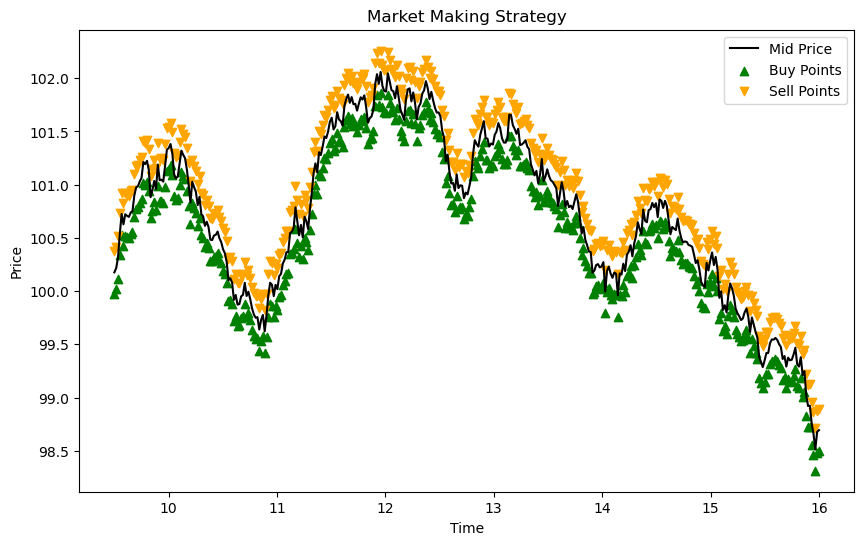

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# 随机生成中间价格路径
np.random.seed(0)
times = np.linspace(9.5, 16, 390)  # 从9:30到16:00，每分钟一个数据点
mid_prices = np.cumsum(np.random.randn(390) * 0.1) + 100
# 这里我们简化地假设买点和卖点是基于某种固定的策略确定的
buy_points = mid_prices - 0.2
sell_points = mid_prices + 0.2
# 绘制图形
plt.figure(figsize=(10, 6))
plt.plot(times, mid_prices, label='Mid Price', color='black')
plt.scatter(times, buy_points, label='Buy Points', color='green', marker='^')
plt.scatter(times, sell_points, label='Sell Points', color='orange', marker='v')
plt.legend()
plt.title("Market Making Strategy")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [4]:
# 假设做市商在每个时间点买入或卖出1单位的资产
quantity = 1
# 计算总投资和总收入
total_investment = np.sum(buy_points) * quantity
total_revenue = np.sum(sell_points) * quantity
# 计算回报率
return_rate = (total_revenue - total_investment) / total_investment
print(f" Return of Market Makeing Stratigies：{return_rate:.2%}")

 Return of Market Makeing Stratigies：0.40%
